In [1]:
import pandas as pd
import numpy as np
import faiss
from tqdm.notebook import tqdm
import datetime as dt
from adjdatatools.preprocessing import AdjustedScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load data

## Base

### Base dataset

In [2]:
df_base = pd.read_csv("datasets/base.csv", index_col=0)
df_base.head()

0          1          2          3           4           5  \
Id                                                                            
0-base -115.083890  11.152912 -64.426760 -118.88089  216.482440 -104.698060   
1-base  -34.562202  13.332763 -69.787610 -166.53348   57.680607  -86.098370   
2-base  -54.233746   6.379371 -29.210136 -133.41383  150.895830  -99.435326   
3-base  -87.520130   4.037884 -87.803030 -185.06763   76.369540  -58.985165   
4-base  -72.743850   6.522049  43.671265 -140.60803    5.820023 -112.074080   

                 6          7           8           9  ...          62  \
Id                                                     ...               
0-base -469.070588  44.348083  120.915344  181.449700  ...  -42.808693   
1-base  -85.076666 -35.637436  119.718636  195.234190  ... -117.767525   
2-base   52.554795  62.381706  128.951450  164.381470  ...  -76.397800   
3-base -383.182845 -33.611237  122.031910  136.233580  ...  -70.647940   
4-base -397.711282  45.182500  122.167180  112.119064  ...  -57.199104   

               63         64          65        66         67          68  \
Id                                                                          
0-base  38.800827 -151.76218  -74.389090  63.66634  -4.703861   92.933610   
1-base  41.100000 -157.82940  -94.446806  68.20211  24.346846  179.937930   
2-base  46.011803 -207.14442  127.325570  65.56618  66.325680   81.073490   
3-base  -6.358921 -147.20105  -37.692750  66.20289 -20.566910  137.206940   
4-base  56.642403 -159.35184   85.944724  66.76632  -2.505783   65.315285   

                69           70         71  
Id                                          
0-base  115.269190  -112.756640 -60.830353  
1-base  116.834000   -84.888941 -59.524610  
2-base  116.594154 -1074.464888 -32.527206  
3-base  117.474100 -1074.464888 -72.915490  
4-base  135.051590 -1074.464888   0.319401  

[5 rows x 72 columns]

In [3]:
df_base.shape

(2918139, 72)

In [4]:
df_base.describe()

0             1             2             3             4  \
count  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06   
mean  -8.622947e+01  8.080077e+00 -4.458080e+01 -1.466350e+02  1.113166e+02   
std    2.489132e+01  4.953387e+00  3.863166e+01  1.984480e+01  4.634809e+01   
min   -1.994687e+02 -1.391461e+01 -2.400734e+02 -2.326671e+02 -1.055830e+02   
25%   -1.030654e+02  4.708491e+00 -6.955949e+01 -1.599051e+02  8.050795e+01   
50%   -8.623150e+01  8.038950e+00 -4.381661e+01 -1.467768e+02  1.118730e+02   
75%   -6.925658e+01  1.147007e+01 -1.962527e+01 -1.333277e+02  1.423743e+02   
max    2.151555e+01  2.993721e+01  1.609372e+02 -5.137478e+01  3.196645e+02   

                  5             6             7             8             9  \
count  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06   
mean  -7.199138e+01 -3.922239e+02  2.035283e+01  1.236842e+02  1.244581e+02   
std    2.818607e+01  2.716550e+02  6.421638e+01  6.356109e+00  6.443058e+01   
min   -2.110086e+02 -7.914699e+02 -3.018597e+02  9.315305e+01 -1.738719e+02   
25%   -9.137994e+01 -6.293318e+02 -2.222147e+01  1.194840e+02  8.176751e+01   
50%   -7.192230e+01 -4.222016e+02  2.080477e+01  1.238923e+02  1.234977e+02   
75%   -5.244111e+01 -1.566686e+02  6.391821e+01  1.279705e+02  1.672206e+02   
max    5.880624e+01  1.096325e+02  3.412282e+02  1.522612e+02  4.275421e+02   

       ...            62            63            64            65  \
count  ...  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06   
mean   ... -7.902286e+01  3.329735e+01 -1.547962e+02  1.415132e+01   
std    ...  3.045642e+01  2.888603e+01  4.122929e+01  9.895115e+01   
min    ... -2.205662e+02 -8.850774e+01 -3.539028e+02 -1.575944e+02   
25%    ... -9.876390e+01  1.698862e+01 -1.807799e+02 -7.130038e+01   
50%    ... -7.848812e+01  3.471502e+01 -1.539773e+02  1.382693e+01   
75%    ... -5.853355e+01  5.216429e+01 -1.273405e+02  9.966753e+01   
max    ...  6.017411e+01  1.541678e+02  2.436099e+01  1.850981e+02   

                 66            67            68            69            70  \
count  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06   
mean   6.779167e+01  2.354490e+01  7.495930e+01  1.155667e+02 -7.993390e+02   
std    1.823356e+00  5.534224e+01  6.134500e+01  2.117518e+01  3.854131e+02   
min    5.950944e+01 -2.331382e+02 -2.036016e+02  1.572448e+01 -1.297931e+03   
25%    6.658096e+01 -1.251624e+01  3.377574e+01  1.016867e+02 -1.074465e+03   
50%    6.781458e+01  2.341649e+01  7.492997e+01  1.160244e+02 -1.074465e+03   
75%    6.902666e+01  5.975511e+01  1.158760e+02  1.295524e+02 -5.057445e+02   
max    7.571203e+01  3.148988e+02  3.395738e+02  2.147063e+02  9.877081e+01   

                 71  
count  2.918139e+06  
mean  -4.779125e+01  
std    4.174802e+01  
min   -2.267801e+02  
25%   -7.566641e+01  
50%   -4.859196e+01  
75%   -1.971424e+01  
max    1.269732e+02  

[8 rows x 72 columns]

# train

In [5]:
df_train = pd.read_csv("datasets/train.csv", index_col=0)
df_train.head()

0          1           2          3           4           5  \
Id                                                                             
0-query -53.882748  17.971436  -42.117104 -183.93668  187.517490  -87.144930   
1-query -87.776370   6.806268  -32.054546 -177.26039  120.803330  -83.810590   
2-query -49.979565   3.841486 -116.118590 -180.40198  190.128430  -50.837620   
3-query -47.810562   9.086598 -115.401695 -121.01136   94.652840 -109.255410   
4-query -79.632126  14.442886  -58.903397 -147.05254   57.127068  -16.239529   

                  6          7           8           9  ...         63  \
Id                                                      ...              
0-query -347.360606  38.307602  109.085560   30.413513  ...  70.107360   
1-query  -94.572749 -78.433090  124.915900  140.331070  ...   4.669178   
2-query   26.943937 -30.447489  125.771164  211.607820  ...  78.039764   
3-query -775.150134  79.186520  124.003100  242.650650  ...  44.515266   
4-query -321.317964  45.984676  125.941284  103.392670  ...  45.028910   

                64          65         66          67          68          69  \
Id                                                                              
0-query -155.80257 -101.965943  65.903790   34.457500   62.642094  134.763600   
1-query -151.69771   -1.638704  68.170876   25.096191   89.974976  130.589630   
2-query -169.14620   82.144186  66.008220   18.400496  212.409730  121.931470   
3-query -145.41675   93.990981  64.131350  106.061920   83.178760  118.277725   
4-query -196.09207 -117.626337  66.926220   42.456170   77.621765   92.479930   

                  70         71        Target  
Id                                             
0-query  -415.750254 -25.958572   675816-base  
1-query -1035.092211 -51.276833   366656-base  
2-query -1074.464888 -22.547178  1447819-base  
3-query -1074.464888 -19.902788  1472602-base  
4-query -1074.464888 -21.149351   717819-base  

[5 rows x 73 columns]

In [6]:
df_train.describe()

0              1              2              3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      -85.328679       7.664345     -43.667046    -146.118630   
std        25.803845       4.955651      39.111064      20.434841   
min      -186.280270     -11.560507    -224.896060    -223.307220   
25%      -103.309147       4.313784     -69.494487    -160.028520   
50%       -85.273695       7.652854     -42.830246    -146.067445   
75%       -67.330810      10.981191     -17.713690    -132.277745   
max        14.585236      28.917845     128.108460     -60.751625   

                   4              5              6              7  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      111.770592     -73.178792    -440.615118      21.231588   
std        47.700958      28.718853     279.017550      65.985214   
min       -93.272020    -184.962450    -791.469482    -278.582820   
25%        79.474322     -92.834080    -738.536868     -22.131764   
50%       112.260100     -73.364420    -511.837758      22.278989   
75%       143.760830     -53.699612    -201.116578      65.899595   
max       301.363600      51.849710     109.625188     288.171840   

                   8              9  ...             62             63  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean      123.067891     126.120201  ...     -81.145553      36.898233   
std         6.492081      64.912752  ...      30.675871      25.357686   
min        94.831150    -142.156950  ...    -210.059310     -60.779335   
25%       118.674642      82.545028  ...    -101.504830      19.774804   
50%       123.087540     125.963340  ...     -80.859640      36.711365   
75%       127.541802     169.701005  ...     -60.492451      53.919520   
max       149.356200     392.827150  ...      47.733450     145.667130   

                  64             65             66             67  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean     -152.223082      14.001695      67.799560      23.029277   
std        41.020285      99.079597       1.838012      55.470761   
min      -317.831670    -157.590189      60.668890    -203.746380   
25%      -178.929470     -71.745018      66.560655     -14.144571   
50%      -151.576985      14.072663      67.813585      23.441363   
75%      -124.436974     100.011024      69.058750      59.941065   
max        11.907364     185.095137      74.779884     266.493320   

                  68             69             70             71  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean       73.412076     115.189717    -709.761548     -48.505704  
std        62.203132      21.582238     405.961084      41.215124  
min      -181.973820      22.598862   -1297.871984    -209.935760  
25%        31.685548     100.589324   -1074.464888     -76.478591  
50%        72.880192     115.236635    -808.801696     -48.700929  
75%       114.469224     129.791085    -357.087323     -20.487869  
max       319.867520     201.761260      98.768233     126.191790  

[8 rows x 72 columns]

In [7]:
targets = df_train["Target"]
df_train.drop("Target", axis=1, inplace=True)

# validation

In [8]:
df_validation = pd.read_csv("datasets/validation.csv", index_col=0)
df_validation.head()

0          1          2          3          4  \
Id                                                                    
100000-query -57.372734   3.597752 -13.213642 -125.92679  110.74594   
100001-query -53.758705  12.790300 -43.268543 -134.41762  114.44991   
100002-query -64.175095  -3.980927  -7.679249 -170.16093   96.44616   
100003-query -99.286860  16.123936   9.837166 -148.06044   83.69708   
100004-query -79.532920  -0.364173 -16.027431 -170.88495  165.45392   

                       5           6           7           8           9  ...  \
Id                                                                        ...   
100000-query  -81.279594 -461.003172  139.815720  112.880980   75.215750  ...   
100001-query  -90.520130 -759.626065   63.995087  127.117905   53.128998  ...   
100002-query  -62.377740 -759.626065   87.477554  131.270110  168.920320  ...   
100003-query -133.729720   58.576403  -19.046660  115.042404   75.206730  ...   
100004-query  -28.291668   33.931936   34.411217  128.903980  102.086914  ...   

                     62         63         64          65        66  \
Id                                                                    
100000-query  -75.51302  52.830902 -143.43945   59.051935  69.28224   
100001-query  -79.44183  29.185436 -168.60590  -82.872443  70.76560   
100002-query -134.79541  37.368730 -159.66231 -119.232725  67.71044   
100003-query  -77.23611  44.100494 -132.53012 -106.318982  70.88396   
100004-query -123.77025  45.635944 -134.25893   13.735359  70.61763   

                     67         68          69           70          71  
Id                                                                       
100000-query  61.927513  111.59253  115.140656 -1099.130485 -117.079360  
100001-query -65.975950   97.07716  123.391640  -744.442332  -25.009320  
100002-query  86.002060  137.63641  141.081630  -294.052271  -70.969604  
100003-query  23.577892  133.18396  143.252940  -799.363667  -89.392670  
100004-query  15.332115  154.56812  101.700640 -1171.892332 -125.307890  

[5 rows x 72 columns]

In [9]:
df_validation.describe()

0              1              2              3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      -85.302233       7.669724     -43.842474    -146.119797   
std        25.777321       4.956990      39.138775      20.495541   
min      -190.353330     -11.109877    -217.538420    -220.050890   
25%      -103.231790       4.292425     -69.680916    -160.210287   
50%       -85.296745       7.657888     -43.230835    -146.080365   
75%       -67.422104      10.993900     -17.765821    -132.119278   
max        14.427986      27.409784     134.859800     -57.381890   

                   4              5              6              7  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      111.635071     -73.273042    -441.396759      21.594242   
std        47.751576      28.515740     279.242585      66.478048   
min       -81.198990    -176.705030    -791.460243    -265.608430   
25%        79.101920     -92.789803    -740.620025     -21.804730   
50%       111.959330     -73.579283    -513.922978      22.138012   
75%       143.903735     -53.861139    -202.572440      66.097697   
max       302.065370      50.255325     109.632035     279.468900   

                   8              9  ...             62             63  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean      123.077725     126.001062  ...     -81.129311      36.778882   
std         6.504931      64.981697  ...      30.691590      25.427103   
min        96.218350    -135.667300  ...    -215.152280     -66.265970   
25%       118.657689      82.311205  ...    -101.690472      19.564135   
50%       123.062568     126.083595  ...     -81.027250      36.414150   
75%       127.538967     169.680500  ...     -60.274745      53.888420   
max       151.822560     392.827150  ...      41.390480     141.025270   

                  64             65             66             67  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean     -152.341249      14.397762      67.788892      23.250779   
std        41.246347      98.695231       1.844522      55.403862   
min      -337.632870    -157.593541      60.377728    -210.672800   
25%      -179.115082     -70.420034      66.546130     -13.863008   
50%      -151.426035      14.768218      67.800445      23.508739   
75%      -124.400438      99.803923      69.040832      60.154775   
max        14.602035     185.094333      75.400475     251.288590   

                  68             69             70             71  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean       73.114446     115.196935    -709.457021     -48.416276  
std        62.056224      21.493081     405.665764      41.292843  
min      -175.921780      25.271042   -1297.923999    -209.935760  
25%        31.494840     100.538862   -1074.464888     -76.359190  
50%        72.152398     115.280990    -807.029697     -48.670001  
75%       114.317053     129.770215    -358.400478     -20.283335  
max       305.937530     201.599980      98.737079     111.831955  

[8 rows x 72 columns]

# scaling

In [10]:
scaler = AdjustedScaler()

In [11]:
start_time = dt.datetime.now().timestamp()
scaler.fit(df_base)
time_spent = dt.datetime.now().timestamp() - start_time
time_spent

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(new_data_sample, ignore_index=True)[[column_name]]
C:\Users\Admin\anaconda3\Lib\site-packages\adjdatatools\preprocessing.py:117: FutureWarning: The frame.append

164.2516679763794

## df_base

In [12]:
start_time = dt.datetime.now().timestamp()
df_base = scaler.transform(df_base)
time_spent = dt.datetime.now().timestamp() - start_time
time_spent

17.94969081878662

In [13]:
df_base = pd.DataFrame(df_base)
df_base.describe()

0             1             2             3             4  \
count  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06   
mean   1.498588e-05  1.526432e-03 -3.853428e-03  1.338051e-03 -2.256177e-03   
std    1.840755e-01  1.838449e-01  1.947978e-01  1.872339e-01  1.879490e-01   
min   -8.374080e-01 -8.148062e-01 -9.896128e-01 -8.103675e-01 -8.818193e-01   
25%   -1.244898e-01 -1.236100e-01 -1.298069e-01 -1.238638e-01 -1.271904e-01   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.255324e-01  1.273458e-01  1.219833e-01  1.268916e-01  1.236876e-01   
max    7.968074e-01  8.127538e-01  1.032459e+00  9.001095e-01  8.426283e-01   

                  5             6             7             8             9  \
count  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06   
mean  -4.436489e-04  3.326787e-02 -1.313083e-03 -6.175055e-03  2.826202e-03   
std    1.810283e-01  3.014696e-01  1.865750e-01  1.886840e-01  1.896106e-01   
min   -8.932979e-01 -4.097961e-01 -9.374733e-01 -9.125071e-01 -8.751194e-01   
25%   -1.249690e-01 -2.298631e-01 -1.250090e-01 -1.308614e-01 -1.228064e-01   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.251202e-01  2.946758e-01  1.252623e-01  1.210641e-01  1.286707e-01   
max    8.396193e-01  5.902039e-01  9.309621e-01  8.421451e-01  8.947622e-01   

       ...            62            63            64            65  \
count  ...  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06   
mean   ... -3.337413e-03 -1.013163e-02 -3.849307e-03  9.466092e-04   
std    ...  1.900843e-01  2.064388e-01  1.937963e-01  2.887462e-01   
min    ... -8.867368e-01 -8.806319e-01 -9.397404e-01 -5.002191e-01   
25%    ... -1.265450e-01 -1.266846e-01 -1.259843e-01 -2.484073e-01   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  1.245403e-01  1.247041e-01  1.252049e-01  2.504887e-01   
max    ...  8.654175e-01  8.536888e-01  8.382704e-01  4.997809e-01   

                 66            67            68            69            70  \
count  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06  2.918139e+06   
mean  -2.351708e-03  4.445137e-04  8.936315e-05 -4.134882e-03  2.314199e-01   
std    1.871644e-01  1.915882e-01  1.868976e-01  1.912854e-01  3.241872e-01   
min   -8.525080e-01 -8.881616e-01 -8.485920e-01 -9.060569e-01 -1.879671e-01   
25%   -1.266290e-01 -1.243948e-01 -1.253831e-01 -1.295199e-01  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.244185e-01  1.258000e-01  1.247489e-01  1.222042e-01  4.783747e-01   
max    8.106599e-01  1.009077e+00  8.062808e-01  8.914401e-01  9.868579e-01   

                 71  
count  2.918139e+06  
mean   3.603293e-03  
std    1.878714e-01  
min   -8.018691e-01  
25%   -1.218385e-01  
50%    0.000000e+00  
75%    1.299534e-01  
max    7.900656e-01  

[8 rows x 72 columns]

## df_train

In [14]:
start_time = dt.datetime.now().timestamp()
df_train = scaler.transform(df_train)
time_spent = dt.datetime.now().timestamp() - start_time
time_spent

0.3930988311767578

In [15]:
df_train = pd.DataFrame(df_train)
df_train.describe()

0              1              2              3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.006677      -0.013903       0.000754       0.006210   
std         0.190824       0.183929       0.197215       0.192801   
min        -0.739877      -0.727434      -0.913082      -0.722057   
25%        -0.126292      -0.138260      -0.129479      -0.125029   
50%         0.007083      -0.014330       0.004974       0.006693   
75%         0.139774       0.109201       0.131622       0.136797   
max         0.745557       0.774920       0.866922       0.811640   

                   4              5              6              7  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.000415      -0.008070      -0.020434       0.001240   
std         0.193435       0.184450       0.309640       0.191714   
min        -0.831896      -0.726013      -0.409796      -0.869844   
25%        -0.131382      -0.134308      -0.351054      -0.124748   
50%         0.001570      -0.009262      -0.099474       0.004283   
75%         0.129310       0.117037       0.245350       0.131019   
max         0.768415       0.794940       0.590196       0.776811   

                   8              9  ...             62             63  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean       -0.024471       0.007718  ...      -0.016586       0.015603   
std         0.192720       0.191030  ...       0.191454       0.181223   
min        -0.862692      -0.781786  ...      -0.821161      -0.682466   
25%        -0.154887      -0.120518  ...      -0.143652      -0.106773   
50%        -0.023888       0.007256  ...      -0.014801       0.014267   
75%         0.108339       0.135970  ...       0.112314       0.137248   
max         0.755909       0.792601  ...       0.787773       0.792938   

                  64             65             66             67  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.008245       0.000510      -0.001542      -0.001340   
std         0.192814       0.289121       0.188669       0.192033   
min        -0.770190      -0.500207      -0.733493      -0.786411   
25%        -0.117287      -0.249705      -0.128713      -0.130032   
50%         0.011282       0.000717      -0.000102       0.000086   
75%         0.138853       0.251491       0.127712       0.126444   
max         0.779733       0.499772       0.714977       0.841503   

                  68             69             70             71  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean       -0.004625      -0.007540       0.306767       0.000388  
std         0.189512       0.194963       0.341471       0.185473  
min        -0.782699      -0.843957      -0.187917      -0.726068  
25%        -0.131751      -0.139433       0.000000      -0.125493  
50%        -0.006245      -0.007117       0.223460      -0.000490  
75%         0.120463       0.124361       0.603416       0.126472  
max         0.746242       0.774501       0.986856       0.786549  

[8 rows x 72 columns]

## df_validation

In [16]:
start_time = dt.datetime.now().timestamp()
df_validation = scaler.transform(df_validation)
time_spent = dt.datetime.now().timestamp() - start_time
time_spent

0.35767579078674316

In [17]:
df_validation = pd.DataFrame(df_validation)
df_validation.describe()

0              1              2              3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.006872      -0.013704      -0.000130       0.006199   
std         0.190628       0.183979       0.197355       0.193374   
min        -0.769998      -0.710709      -0.875982      -0.691334   
25%        -0.125720      -0.139052      -0.130419      -0.126744   
50%         0.006913      -0.014143       0.002954       0.006571   
75%         0.139099       0.109673       0.131359       0.138292   
max         0.744394       0.718948       0.900965       0.843433   

                   4              5              6              7  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.000965      -0.008675      -0.021302       0.002294   
std         0.193640       0.183146       0.309890       0.193146   
min        -0.782938      -0.672979      -0.409785      -0.832148   
25%        -0.132892      -0.134024      -0.353365      -0.123798   
50%         0.000350      -0.010642      -0.101788       0.003874   
75%         0.129890       0.116000       0.243734       0.131595   
max         0.771261       0.784700       0.590203       0.751526   

                   8              9  ...             62             63  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean       -0.024180       0.007367  ...      -0.016484       0.014750   
std         0.193102       0.191233  ...       0.191552       0.181719   
min        -0.821512      -0.762688  ...      -0.852947      -0.721677   
25%        -0.155390      -0.121206  ...      -0.144810      -0.108278   
50%        -0.024629       0.007610  ...      -0.015847       0.012143   
75%         0.108254       0.135910  ...       0.113673       0.137026   
max         0.829124       0.792601  ...       0.748185       0.759764   

                  64             65             66             67  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.007690       0.001666      -0.002637      -0.000574   
std         0.193876       0.287999       0.189337       0.191802   
min        -0.863264      -0.500217      -0.763380      -0.810389   
25%        -0.118159      -0.245838      -0.130204      -0.129057   
50%         0.011992       0.002747      -0.001451       0.000319   
75%         0.139024       0.250887       0.125873       0.127184   
max         0.792399       0.499770       0.778679       0.788866   

                  68             69             70             71  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean       -0.005531      -0.007475       0.307023       0.000791  
std         0.189064       0.194157       0.341223       0.185823  
min        -0.764261      -0.819818      -0.187961      -0.726068  
25%        -0.132332      -0.139889       0.000000      -0.124956  
50%        -0.008462      -0.006716       0.224951      -0.000351  
75%         0.119999       0.124172       0.602312       0.127392  
max         0.703802       0.773044       0.986830       0.721928  

[8 rows x 72 columns]

# Create index

In [79]:
dims = df_base.shape[1]
# n_cells = round(df_base.shape[0] ** 0.5)
n_cells = 1
# how many cells
# quantizer = faiss.IndexFlatL2(dims, metric = METRIC_INNER_PRODUCT)
# quantizer = faiss.IndexFlatIP(dims) те же результаты, что у предыдущего
quantizer = faiss.IndexIVFPQ()
idx_l2 = faiss.IndexIVFFlat(quantizer)

IndexError: tuple index out of range

In [68]:
idx_l2.train(np.ascontiguousarray(df_base.values).astype('float32'))

idx_l2.add(np.ascontiguousarray(df_base.values).astype('float32'))

In [20]:
# idx_l2.nprobe = 5000

In [21]:
base_index = {k: v for k, v in enumerate(df_base.index.to_list())}

#del df_base

# train search

In [69]:
start_time = dt.datetime.now().timestamp()
vecs, idx = idx_l2.search(np.ascontiguousarray(df_train.values).astype('float32'), 100)
time_spent = dt.datetime.now().timestamp() - start_time
time_spent

2432.0553250312805

In [70]:
acc = 0
for target, el in zip(targets.values.tolist(), idx.tolist()):
    acc += int(target in [base_index[r] for r in el])

print(100 * acc / len(idx))

71.094


In [71]:
base_index[1883443]

'2632056-base'

In [72]:
list_of_analysis = []
for target, el, dist in zip(targets.values.tolist(), idx.tolist(), vecs.tolist()):
    row = []
    row.append(target)
    print('target:', target)
    row.append(dist[0])
    
    print('min:', dist[0])
    target_not_found = True
    for r in range(len(el)):
        if target == base_index[el[r]]:
            row.append(dist[r])
            print('distance', dist[r])
            target_not_found = False
    if target_not_found:
        print('target: - , distance: -')
        row.append(np.nan)
    print('min:', dist[99])
    row.append(dist[99])
    list_of_analysis.append(row)
    print('---------------------------')
    print()
    


target: 675816-base
min: 0.9355693459510803
distance 0.9355693459510803
min: 1.7485096454620361
---------------------------

target: 366656-base
min: 1.0234571695327759
target: - , distance: -
min: 2.567523241043091
---------------------------

target: 1447819-base
min: 0.8328937888145447
distance 1.6607855558395386
min: 1.6941990852355957
---------------------------

target: 1472602-base
min: 0.9770658016204834
distance 0.9770658016204834
min: 2.567612648010254
---------------------------

target: 717819-base
min: 0.0873585045337677
distance 0.46951064467430115
min: 0.606313943862915
---------------------------

target: 2381316-base
min: 0.32999810576438904
distance 0.32999810576438904
min: 2.3381423950195312
---------------------------

target: 773187-base
min: 0.034022022038698196
target: - , distance: -
min: 2.2395036220550537
---------------------------

target: 2488580-base
min: 0.017817014828324318
target: - , distance: -
min: 1.187255859375
---------------------------

target: 

min: 2.1814589500427246
---------------------------

target: 231740-base
min: 0.48738202452659607
target: - , distance: -
min: 2.0044217109680176
---------------------------

target: 140457-base
min: 2.139831304550171
distance 2.4512617588043213
min: 3.379920482635498
---------------------------

target: 1166798-base
min: 0.8721950054168701
distance 1.4939136505126953
min: 2.0017220973968506
---------------------------

target: 1290091-base
min: 0.2740512192249298
distance 0.2740512192249298
min: 2.1734001636505127
---------------------------

target: 1639829-base
min: 1.7012410163879395
target: - , distance: -
min: 2.4604945182800293
---------------------------

target: 223672-base
min: 0.20000821352005005
distance 0.8457722067832947
min: 0.8960778713226318
---------------------------

target: 1039504-base
min: 1.0970630645751953
distance 1.0970630645751953
min: 2.166684865951538
---------------------------

target: 1367165-base
min: 0.8553546071052551
target: - , distance: -
min: 1.7

min: 0.00472638476639986
distance 0.00472638476639986
min: 2.3884005546569824
---------------------------

target: 1098627-base
min: 1.541686773300171
target: - , distance: -
min: 2.405766487121582
---------------------------

target: 1121518-base
min: 0.0682634711265564
distance 0.0682634711265564
min: 2.879315137863159
---------------------------

target: 426330-base
min: 0.9530573487281799
distance 2.2833938598632812
min: 2.4297380447387695
---------------------------

target: 259964-base
min: 0.7028964757919312
distance 0.7028964757919312
min: 2.271587610244751
---------------------------

target: 130337-base
min: 0.877020001411438
distance 0.877020001411438
min: 1.9911667108535767
---------------------------

target: 1180481-base
min: 0.7587448358535767
distance 0.9257168769836426
min: 1.325422763824463
---------------------------

target: 1717115-base
min: 1.6959526538848877
distance 2.054542064666748
min: 3.0470707416534424
---------------------------

target: 1084356-base
min: 

min: 2.966538667678833
---------------------------

target: 1234086-base
min: 0.5144726037979126
target: - , distance: -
min: 1.6997230052947998
---------------------------

target: 622497-base
min: 0.6415757536888123
distance 0.6415757536888123
min: 2.466851234436035
---------------------------

target: 2784067-base
min: 0.6952270269393921
distance 1.7642430067062378
min: 2.0468409061431885
---------------------------

target: 157563-base
min: 0.2499542236328125
distance 0.6532760262489319
min: 1.7185193300247192
---------------------------

target: 1093465-base
min: 1.020706057548523
target: - , distance: -
min: 2.144479990005493
---------------------------

target: 1024706-base
min: 0.4227887690067291
distance 0.4227887690067291
min: 2.7147438526153564
---------------------------

target: 845217-base
min: 0.8839789628982544
distance 0.8966330289840698
min: 1.99275541305542
---------------------------

target: 952224-base
min: 0.006526869256049395
distance 0.006526869256049395
min: 2

min: 2.72574520111084
---------------------------

target: 654700-base
min: 0.058359645307064056
distance 0.058359645307064056
min: 2.5525999069213867
---------------------------

target: 1344590-base
min: 0.006156302057206631
target: - , distance: -
min: 0.3143758773803711
---------------------------

target: 98338-base
min: 1.042297601699829
target: - , distance: -
min: 1.9355494976043701
---------------------------

target: 597785-base
min: 0.0444829985499382
distance 0.0444829985499382
min: 2.4210453033447266
---------------------------

target: 990096-base
min: 0.03956916928291321
distance 0.03956916928291321
min: 1.5296218395233154
---------------------------

target: 271686-base
min: 0.25036507844924927
distance 0.25036507844924927
min: 1.8533117771148682
---------------------------

target: 2015869-base
min: 0.522962212562561
distance 0.5647757053375244
min: 0.9733955264091492
---------------------------

target: 231357-base
min: 0.716335654258728
distance 0.716335654258728
min

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



target: - , distance: -
min: 2.8734683990478516
---------------------------

target: 505396-base
min: 0.0732080340385437
distance 0.0732080340385437
min: 2.217772960662842
---------------------------

target: 932453-base
min: 0.8849111199378967
distance 0.8849111199378967
min: 2.1117587089538574
---------------------------

target: 97454-base
min: 0.06564553081989288
distance 0.06564553081989288
min: 2.397446393966675
---------------------------

target: 654257-base
min: 0.20507794618606567
target: - , distance: -
min: 1.2542035579681396
---------------------------

target: 111861-base
min: 0.805846095085144
distance 1.1121444702148438
min: 1.5669124126434326
---------------------------

target: 107686-base
min: 0.9409104585647583
target: - , distance: -
min: 1.5582093000411987
---------------------------

target: 4076365-base
min: 1.1116429567337036
target: - , distance: -
min: 1.938127040863037
---------------------------

target: 229375-base
min: 0.17472407221794128
distance 0.17472

min: 2.499699115753174
---------------------------

target: 1036845-base
min: 0.22750923037528992
distance 0.22750923037528992
min: 1.5204949378967285
---------------------------

target: 1162087-base
min: 0.2873322367668152
distance 0.5325446724891663
min: 2.049956798553467
---------------------------

target: 904079-base
min: 0.3921419382095337
distance 0.3921419382095337
min: 2.466933250427246
---------------------------

target: 53603-base
min: 0.0020439999643713236
distance 0.0020439999643713236
min: 2.8893399238586426
---------------------------

target: 1182708-base
min: 0.8422306776046753
distance 1.1640963554382324
min: 2.4264473915100098
---------------------------

target: 2962131-base
min: 1.140642523765564
target: - , distance: -
min: 2.4754230976104736
---------------------------

target: 1372600-base
min: 0.49834537506103516
distance 0.7292516231536865
min: 2.0179905891418457
---------------------------

target: 3324147-base
min: 1.309267282485962
distance 1.309267282485


target: 263230-base
min: 1.4092559814453125
distance 1.4092559814453125
min: 3.26407790184021
---------------------------

target: 403575-base
min: 0.3510001301765442
distance 0.3510001301765442
min: 2.1055197715759277
---------------------------

target: 371633-base
min: 1.2287325859069824
distance 1.2287325859069824
min: 2.6487996578216553
---------------------------

target: 2304393-base
min: 0.9463167190551758
distance 0.9463167190551758
min: 2.517916679382324
---------------------------

target: 944125-base
min: 1.6308534145355225
target: - , distance: -
min: 2.668390989303589
---------------------------

target: 82682-base
min: 0.10411792993545532
distance 1.7927255630493164
min: 1.8704544305801392
---------------------------

target: 1547235-base
min: 0.33142948150634766
target: - , distance: -
min: 1.2826545238494873
---------------------------

target: 211927-base
min: 0.8523139357566833
distance 0.8523139357566833
min: 2.651820182800293
---------------------------

target: 1

target: 360284-base
min: 1.1959543228149414
distance 1.1959543228149414
min: 2.6100096702575684
---------------------------

target: 1602909-base
min: 1.2868934869766235
target: - , distance: -
min: 2.4941773414611816
---------------------------

target: 2490552-base
min: 0.24702924489974976
distance 0.24702924489974976
min: 2.013737678527832
---------------------------

target: 193172-base
min: 0.5982071757316589
distance 0.5982071757316589
min: 1.9656658172607422
---------------------------

target: 143090-base
min: 0.5134792327880859
distance 0.5134792327880859
min: 2.4281182289123535
---------------------------

target: 748702-base
min: 0.24871215224266052
distance 0.24871215224266052
min: 2.3451504707336426
---------------------------

target: 3506731-base
min: 0.7967233657836914
distance 0.9638193845748901
min: 2.1714043617248535
---------------------------

target: 1605370-base
min: 0.34821617603302
distance 0.34821617603302
min: 2.4460079669952393
---------------------------

t

distance 1.9892983436584473
min: 2.3348684310913086
---------------------------

target: 694535-base
min: 0.700283944606781
target: - , distance: -
min: 1.5268052816390991
---------------------------

target: 529610-base
min: 0.8911712765693665
distance 1.8759905099868774
min: 2.7439372539520264
---------------------------

target: 87190-base
min: 1.0192160606384277
distance 2.2009027004241943
min: 2.2128536701202393
---------------------------

target: 785347-base
min: 0.286225289106369
distance 0.6868313550949097
min: 2.260525703430176
---------------------------

target: 218451-base
min: 0.47846519947052
distance 0.47846519947052
min: 2.101044178009033
---------------------------

target: 142058-base
min: 0.38190576434135437
distance 0.786875307559967
min: 1.6075505018234253
---------------------------

target: 833680-base
min: 0.019874436780810356
distance 0.019874436780810356
min: 1.670382022857666
---------------------------

target: 10832-base
min: 0.07280971109867096
distance 0

min: 0.2908593416213989
distance 1.33170747756958
min: 1.3921597003936768
---------------------------

target: 373985-base
min: 0.9660789966583252
distance 2.716249942779541
min: 2.7915589809417725
---------------------------

target: 1614476-base
min: 0.685720682144165
target: - , distance: -
min: 2.802978515625
---------------------------

target: 1999602-base
min: 1.1993670463562012
target: - , distance: -
min: 2.1657092571258545
---------------------------

target: 233652-base
min: 1.7010722160339355
target: - , distance: -
min: 2.6979689598083496
---------------------------

target: 526150-base
min: 0.8830729722976685
distance 1.4107407331466675
min: 2.1225171089172363
---------------------------

target: 682488-base
min: 0.49471500515937805
target: - , distance: -
min: 2.1075878143310547
---------------------------

target: 691134-base
min: 0.4449867904186249
distance 0.4449867904186249
min: 2.496455669403076
---------------------------

target: 1173782-base
min: 1.33363080024719

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [73]:
columns = ['target', 'min', 'distance', 'max']
df_analysis = pd.DataFrame(list_of_analysis, columns=columns)
df_analysis.head()

target       min  distance       max
0   675816-base  0.935569  0.935569  1.748510
1   366656-base  1.023457       NaN  2.567523
2  1447819-base  0.832894  1.660786  1.694199
3  1472602-base  0.977066  0.977066  2.567613
4   717819-base  0.087359  0.469511  0.606314

In [38]:
df_analysis

target       min  distance       max
0       675816-base  0.935569  0.935569  1.748510
1       366656-base  1.023457       NaN  2.567523
2      1447819-base  0.832894  1.660786  1.694199
3      1472602-base  0.977066  0.977066  2.567613
4       717819-base  0.087359  0.469511  0.606314
...             ...       ...       ...       ...
99995   811868-base  1.079459       NaN  2.331891
99996  1460772-base  1.556411       NaN  2.610189
99997  2366140-base  0.420495  0.428558  2.190578
99998     9252-base  0.134091       NaN  0.351535
99999  2769109-base  0.162424  0.162424  2.715724

[100000 rows x 4 columns]

In [42]:
df_analysis[df_analysis['distance'] == df_analysis['min']].shape[0]

41467

In [43]:
df_analysis[df_analysis['distance'] == df_analysis['max']].shape[0]

60

In [56]:
df_analysis['middle'] = (df_analysis['max'] + df_analysis['min']) / 2

In [59]:
df_analysis = df_analysis.drop('distance_position', axis=1)

In [61]:
df_analysis['dist_from_midle'] = df_analysis['middle'] - df_analysis['distance']
df_analysis

target       min  distance       max    middle  dist_from_midle
0       675816-base  0.935569  0.935569  1.748510  1.342039         0.406470
1       366656-base  1.023457       NaN  2.567523  1.795490              NaN
2      1447819-base  0.832894  1.660786  1.694199  1.263546        -0.397239
3      1472602-base  0.977066  0.977066  2.567613  1.772339         0.795273
4       717819-base  0.087359  0.469511  0.606314  0.346836        -0.122674
...             ...       ...       ...       ...       ...              ...
99995   811868-base  1.079459       NaN  2.331891  1.705675              NaN
99996  1460772-base  1.556411       NaN  2.610189  2.083300              NaN
99997  2366140-base  0.420495  0.428558  2.190578  1.305536         0.876979
99998     9252-base  0.134091       NaN  0.351535  0.242813              NaN
99999  2769109-base  0.162424  0.162424  2.715724  1.439074         1.276650

[100000 rows x 6 columns]

In [62]:
df_analysis.describe()

min      distance            max         middle  \
count  1.000000e+05  71094.000000  100000.000000  100000.000000   
mean   7.485738e-01      0.929236       2.190835       1.469704   
std    5.258498e-01      0.712142       0.581962       0.455880   
min    7.137672e-08      0.000013       0.015747       0.007921   
25%    3.219191e-01      0.314662       1.872633       1.202777   
50%    6.790525e-01      0.801730       2.286577       1.458369   
75%    1.095728e+00      1.437095       2.594149       1.753391   
max    2.893823e+00      3.647376       4.165978       3.262117   

       dist_from_midle  
count     71094.000000  
mean          0.574141  
std           0.539280  
min          -1.365546  
25%           0.183022  
50%           0.667589  
75%           1.018579  
max           1.959409

In [49]:
df_analysis['distance'].value_counts()

1.652623    2
0.114961    2
0.533643    2
1.305259    2
0.329032    2
           ..
2.304458    1
0.037035    1
0.348054    1
0.046718    1
0.162424    1
Name: distance, Length: 71028, dtype: int64

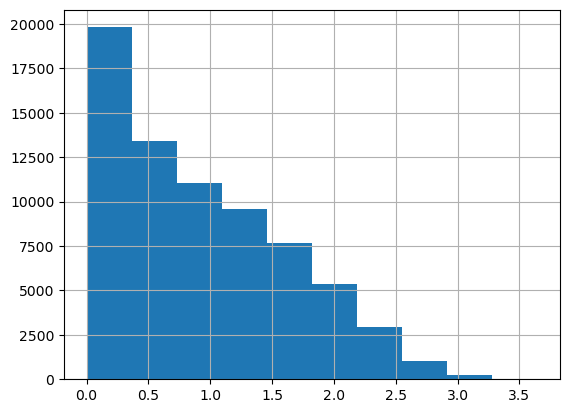

In [48]:
df_analysis['distance'].hist();

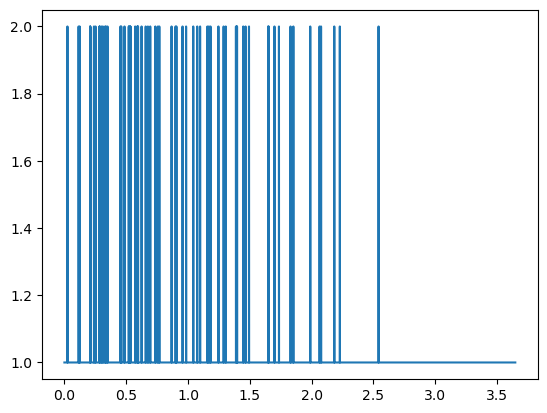

In [46]:
df_analysis['distance'].value_counts().sort_index().plot();

In [39]:
df_analysis.describe()

min      distance            max
count  1.000000e+05  71094.000000  100000.000000
mean   7.485738e-01      0.929236       2.190835
std    5.258498e-01      0.712142       0.581962
min    7.137672e-08      0.000013       0.015747
25%    3.219191e-01      0.314662       1.872633
50%    6.790525e-01      0.801730       2.286577
75%    1.095728e+00      1.437095       2.594149
max    2.893823e+00      3.647376       4.165978

In [49]:
len(idx)

100000

In [50]:
len(vecs)

100000

In [51]:
vecs[0]

array([0.392469  , 0.3939801 , 0.68393075, 0.760528  , 1.0269244 ,
       1.1527371 , 1.1657674 , 1.1743786 , 1.2252567 , 1.2346382 ,
       1.2608349 , 1.2748786 , 1.2785327 , 1.3474665 , 1.3544618 ,
       1.3583914 , 1.3628347 , 1.3805559 , 1.4033703 , 1.4241066 ,
       1.4346334 , 1.435703  , 1.5258403 , 1.5278176 , 1.5331206 ,
       1.5480759 , 1.5889001 , 1.6023505 , 1.6089245 , 1.6300304 ,
       1.6323422 , 1.6410246 , 1.6729786 , 1.6735461 , 1.6748673 ,
       1.6755065 , 1.6766586 , 1.6784071 , 1.679079  , 1.679856  ,
       1.6845305 , 1.6851108 , 1.69049   , 1.7053909 , 1.7086968 ,
       1.7131965 , 1.7245438 , 1.7290134 , 1.7362077 , 1.7373921 ,
       1.7375968 , 1.7384624 , 1.7423508 , 1.7551225 , 1.7718486 ,
       1.7738907 , 1.777476  , 1.7921255 , 1.7989582 , 1.8005552 ,
       1.8017339 , 1.8031049 , 1.8052561 , 1.8120325 , 1.8132619 ,
       1.8224436 , 1.8326102 , 1.8329577 , 1.836071  , 1.8385764 ,
       1.8413726 , 1.8456442 , 1.8510439 , 1.8592849 , 1.86628

In [52]:
len(vecs[0])

100

In [53]:
idx[0]

array([2177660, 2192372,  574649,  342838,  995930, 2363873, 2571634,
       2910875, 2512787, 1243148, 1508869, 2239161, 1954150, 1405698,
       1225777,  536120, 1719453, 2664485, 2504096, 1944289, 2508079,
        211344, 1431220, 2540510, 1043785,  925319, 2536973,  814942,
       2369517,  708579, 1440012,  750347, 1345464, 2560782, 1471135,
        201875, 2021452,  581702,  236041,  447469,  240150,  462353,
       1626118,  365277, 1786180, 1869523,  866548,  996151, 2532819,
        231615, 1191116, 2886161, 1500590, 2779634,  209840, 1919590,
       2356602, 1741644, 1215753, 1909126, 2057288,  340288, 1837653,
       2118172,  981887, 1720921,  748781, 2767494,  106841,  780711,
        321438, 1908173,  339377,   56070,  479393, 1629865, 1562610,
        902498,   38456, 1339781, 1291090,  260743, 2153637, 2875559,
       1073209, 2678884, 2004833,   76468,  929954,  660069, 1405942,
        203180,  218150,  848612, 1781035,  999102, 2119755,  110961,
       1986109, 1398

In [123]:
df_for_cb = pd.DataFrame() 

for i in range(df_train.shape[0]):
    df = pd.DataFrame(idx[i])
    df.columns = ['idx']
    df['query_idx'] = str(i) +'-query'
    df_for_cb = pd.concat([df_for_cb, df])
    

KeyboardInterrupt: 

In [124]:
df_for_cb

idx    query_idx
0   2177660      0-query
1   2192372      0-query
2    574649      0-query
3    342838      0-query
4    995930      0-query
..      ...          ...
95   684584  77257-query
96  1451748  77257-query
97  2906956  77257-query
98  1800845  77257-query
99  1192745  77257-query

[7725800 rows x 2 columns]

In [119]:
df_for_cb = pd.DataFrame(idx[0])
df_for_cb.columns = ['idx']
df_for_cb.head()

idx
0  2177660
1  2192372
2   574649
3   342838
4   995930

In [120]:
df = pd.DataFrame() 
df

Empty DataFrame
Columns: []
Index: []

In [122]:
df = pd.concat([df, df_for_cb])
df

idx
0   2177660
1   2192372
2    574649
3    342838
4    995930
..      ...
95   999102
96  2119755
97   110961
98  1986109
99  1398244

[100 rows x 1 columns]

In [115]:
df_train.index

Index(['0-query', '1-query', '2-query', '3-query', '4-query', '5-query',
       '6-query', '7-query', '8-query', '9-query',
       ...
       '99990-query', '99991-query', '99992-query', '99993-query',
       '99994-query', '99995-query', '99996-query', '99997-query',
       '99998-query', '99999-query'],
      dtype='object', name='Id', length=100000)

In [90]:
def get_base_idx(row):
    return base_index[row['idx']]

In [108]:
df_for_cb['base_idx'] = df_for_cb.apply(get_base_idx, axis=1)
df_for_cb

idx      base_idx
0   2177660  3181043-base
1   2192372  3209652-base
2    574649   645855-base
3    342838   368296-base
4    995930  1206188-base
..      ...           ...
95   999102  1210658-base
96  2119755  3069963-base
97   110961   113636-base
98  1986109  2819524-base
99  1398244  1810261-base

[100 rows x 2 columns]

In [109]:
df_for_cb['query_idx'] = '0-query'
df_for_cb

idx      base_idx query_idx
0   2177660  3181043-base   0-query
1   2192372  3209652-base   0-query
2    574649   645855-base   0-query
3    342838   368296-base   0-query
4    995930  1206188-base   0-query
..      ...           ...       ...
95   999102  1210658-base   0-query
96  2119755  3069963-base   0-query
97   110961   113636-base   0-query
98  1986109  2819524-base   0-query
99  1398244  1810261-base   0-query

[100 rows x 3 columns]

In [110]:
df_for_cb = df_for_cb.merge(df_train, how='inner', left_on='query_idx', right_index=True)
df_for_cb

idx      base_idx query_idx         0         1         2         3  \
0   2177660  3181043-base   0-query  0.239251  0.369039  0.008569 -0.350366   
1   2192372  3209652-base   0-query  0.239251  0.369039  0.008569 -0.350366   
2    574649   645855-base   0-query  0.239251  0.369039  0.008569 -0.350366   
3    342838   368296-base   0-query  0.239251  0.369039  0.008569 -0.350366   
4    995930  1206188-base   0-query  0.239251  0.369039  0.008569 -0.350366   
..      ...           ...       ...       ...       ...       ...       ...   
95   999102  1210658-base   0-query  0.239251  0.369039  0.008569 -0.350366   
96  2119755  3069963-base   0-query  0.239251  0.369039  0.008569 -0.350366   
97   110961   113636-base   0-query  0.239251  0.369039  0.008569 -0.350366   
98  1986109  2819524-base   0-query  0.239251  0.369039  0.008569 -0.350366   
99  1398244  1810261-base   0-query  0.239251  0.369039  0.008569 -0.350366   

           4         5         6  ...        62        63        64        65  \
0   0.306775 -0.097791  0.083055  ... -0.168128  0.252951 -0.008582 -0.337892   
1   0.306775 -0.097791  0.083055  ... -0.168128  0.252951 -0.008582 -0.337892   
2   0.306775 -0.097791  0.083055  ... -0.168128  0.252951 -0.008582 -0.337892   
3   0.306775 -0.097791  0.083055  ... -0.168128  0.252951 -0.008582 -0.337892   
4   0.306775 -0.097791  0.083055  ... -0.168128  0.252951 -0.008582 -0.337892   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.306775 -0.097791  0.083055  ... -0.168128  0.252951 -0.008582 -0.337892   
96  0.306775 -0.097791  0.083055  ... -0.168128  0.252951 -0.008582 -0.337892   
97  0.306775 -0.097791  0.083055  ... -0.168128  0.252951 -0.008582 -0.337892   
98  0.306775 -0.097791  0.083055  ... -0.168128  0.252951 -0.008582 -0.337892   
99  0.306775 -0.097791  0.083055  ... -0.168128  0.252951 -0.008582 -0.337892   

          66        67        68        69        70        71  
0  -0.196025  0.038234 -0.037448  0.169325  0.554073  0.101823  
1  -0.196025  0.038234 -0.037448  0.169325  0.554073  0.101823  
2  -0.196025  0.038234 -0.037448  0.169325  0.554073  0.101823  
3  -0.196025  0.038234 -0.037448  0.169325  0.554073  0.101823  
4  -0.196025  0.038234 -0.037448  0.169325  0.554073  0.101823  
..       ...       ...       ...       ...       ...       ...  
95 -0.196025  0.038234 -0.037448  0.169325  0.554073  0.101823  
96 -0.196025  0.038234 -0.037448  0.169325  0.554073  0.101823  
97 -0.196025  0.038234 -0.037448  0.169325  0.554073  0.101823  
98 -0.196025  0.038234 -0.037448  0.169325  0.554073  0.101823  
99 -0.196025  0.038234 -0.037448  0.169325  0.554073  0.101823  

[100 rows x 75 columns]

In [111]:
df_for_cb = df_for_cb.merge(df_base, how='inner', left_on='base_idx', right_index=True)

In [112]:
df_for_cb

idx      base_idx query_idx       0_x       1_x       2_x       3_x  \
0   2177660  3181043-base   0-query  0.239251  0.369039  0.008569 -0.350366   
1   2192372  3209652-base   0-query  0.239251  0.369039  0.008569 -0.350366   
2    574649   645855-base   0-query  0.239251  0.369039  0.008569 -0.350366   
3    342838   368296-base   0-query  0.239251  0.369039  0.008569 -0.350366   
4    995930  1206188-base   0-query  0.239251  0.369039  0.008569 -0.350366   
..      ...           ...       ...       ...       ...       ...       ...   
95   999102  1210658-base   0-query  0.239251  0.369039  0.008569 -0.350366   
96  2119755  3069963-base   0-query  0.239251  0.369039  0.008569 -0.350366   
97   110961   113636-base   0-query  0.239251  0.369039  0.008569 -0.350366   
98  1986109  2819524-base   0-query  0.239251  0.369039  0.008569 -0.350366   
99  1398244  1810261-base   0-query  0.239251  0.369039  0.008569 -0.350366   

         4_x       5_x       6_x  ...      62_y      63_y      64_y      65_y  \
0   0.306775 -0.097791  0.083055  ...  0.032931  0.088394 -0.007219  0.050037   
1   0.306775 -0.097791  0.083055  ...  0.083624  0.185763  0.106796  0.351255   
2   0.306775 -0.097791  0.083055  ...  0.008480  0.025870  0.004753  0.005376   
3   0.306775 -0.097791  0.083055  ... -0.046691 -0.007696  0.167488  0.357774   
4   0.306775 -0.097791  0.083055  ...  0.035217  0.080155  0.110859 -0.133958   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.306775 -0.097791  0.083055  ... -0.044208 -0.051044 -0.002907  0.090882   
96  0.306775 -0.097791  0.083055  ... -0.106394 -0.015719  0.000223 -0.318028   
97  0.306775 -0.097791  0.083055  ... -0.039271 -0.059615 -0.034863 -0.035993   
98  0.306775 -0.097791  0.083055  ... -0.076144 -0.084067  0.097235  0.054331   
99  0.306775 -0.097791  0.083055  ... -0.070284 -0.061540 -0.184527  0.461352   

        66_y      67_y      68_y      69_y      70_y      71_y  
0   0.101863  0.147257  0.009113  0.073637  0.000000 -0.237566  
1   0.167845  0.172480  0.003625  0.078224  0.000000 -0.218508  
2  -0.010386  0.061319  0.012781  0.099221  0.000000 -0.248807  
3   0.090372  0.108474  0.031962 -0.066258 -0.109443 -0.202499  
4   0.032503  0.105755 -0.064558 -0.037365  0.218450 -0.278752  
..       ...       ...       ...       ...       ...       ...  
95  0.153974  0.103955  0.078865  0.072785 -0.110460 -0.263195  
96  0.140606 -0.024040  0.087326 -0.286117  0.000000 -0.189147  
97 -0.020800  0.114546  0.217463 -0.034999 -0.015610 -0.177422  
98 -0.019420  0.155445  0.135476 -0.081745  0.142358 -0.184105  
99  0.027553  0.041114 -0.027918  0.019591  0.156202 -0.113025  

[100 rows x 147 columns]

In [95]:
df_for_cb

idx      base_idx         0         1         2         3         4  \
0   2177660  3181043-base  0.173995  0.015862  0.326852  0.233147 -0.010922   
1   2192372  3209652-base  0.207984 -0.048717  0.121145  0.192520 -0.048268   
2    574649   645855-base  0.304101 -0.078404  0.271942  0.199423  0.056303   
3    342838   368296-base  0.165739 -0.066824  0.194305  0.232086 -0.077868   
4    995930  1206188-base  0.209701 -0.128968  0.284653  0.269115 -0.096816   
..      ...           ...       ...       ...       ...       ...       ...   
95   999102  1210658-base  0.206342 -0.057560  0.216584  0.157740  0.069264   
96  2119755  3069963-base -0.110019 -0.094325 -0.196846  0.171983 -0.175783   
97   110961   113636-base  0.052580 -0.120757  0.063065  0.140826  0.019904   
98  1986109  2819524-base  0.072027 -0.355548  0.080318  0.076310  0.070617   
99  1398244  1810261-base  0.159556 -0.245418  0.053584  0.109871 -0.050216   

           5         6         7  ...        62        63        64        65  \
0  -0.083818  0.045007  0.357766  ...  0.032931  0.088394 -0.007219  0.050037   
1  -0.072628  0.283104  0.330767  ...  0.083624  0.185763  0.106796  0.351255   
2  -0.026227 -0.118691  0.275297  ...  0.008480  0.025870  0.004753  0.005376   
3  -0.069260 -0.237006  0.269220  ... -0.046691 -0.007696  0.167488  0.357774   
4  -0.128498  0.391737  0.339066  ...  0.035217  0.080155  0.110859 -0.133958   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95 -0.115884  0.368941  0.275131  ... -0.044208 -0.051044 -0.002907  0.090882   
96 -0.169768  0.175871  0.067458  ... -0.106394 -0.015719  0.000223 -0.318028   
97 -0.078592  0.073507  0.195816  ... -0.039271 -0.059615 -0.034863 -0.035993   
98 -0.063475  0.035653  0.151095  ... -0.076144 -0.084067  0.097235  0.054331   
99 -0.138683 -0.316132  0.175605  ... -0.070284 -0.061540 -0.184527  0.461352   

          66        67        68        69        70        71  
0   0.101863  0.147257  0.009113  0.073637  0.000000 -0.237566  
1   0.167845  0.172480  0.003625  0.078224  0.000000 -0.218508  
2  -0.010386  0.061319  0.012781  0.099221  0.000000 -0.248807  
3   0.090372  0.108474  0.031962 -0.066258 -0.109443 -0.202499  
4   0.032503  0.105755 -0.064558 -0.037365  0.218450 -0.278752  
..       ...       ...       ...       ...       ...       ...  
95  0.153974  0.103955  0.078865  0.072785 -0.110460 -0.263195  
96  0.140606 -0.024040  0.087326 -0.286117  0.000000 -0.189147  
97 -0.020800  0.114546  0.217463 -0.034999 -0.015610 -0.177422  
98 -0.019420  0.155445  0.135476 -0.081745  0.142358 -0.184105  
99  0.027553  0.041114 -0.027918  0.019591  0.156202 -0.113025  

[100 rows x 74 columns]

In [96]:
query = df_train.loc['0-query']

In [103]:
newdf = pd.DataFrame(np.repeat(df_train.loc['0-query'].values, 100, axis=0))
# newdf.columns = df_train.columns
print(newdf)

             0
0     0.239251
1     0.239251
2     0.239251
3     0.239251
4     0.239251
...        ...
7195  0.101823
7196  0.101823
7197  0.101823
7198  0.101823
7199  0.101823

[7200 rows x 1 columns]


In [97]:
df_for_cb.merge(query, how='outer',left_index=True, right_index=True)
df_for_cb

idx      base_idx         0         1         2         3         4  \
0   2177660  3181043-base  0.173995  0.015862  0.326852  0.233147 -0.010922   
1   2192372  3209652-base  0.207984 -0.048717  0.121145  0.192520 -0.048268   
2    574649   645855-base  0.304101 -0.078404  0.271942  0.199423  0.056303   
3    342838   368296-base  0.165739 -0.066824  0.194305  0.232086 -0.077868   
4    995930  1206188-base  0.209701 -0.128968  0.284653  0.269115 -0.096816   
..      ...           ...       ...       ...       ...       ...       ...   
95   999102  1210658-base  0.206342 -0.057560  0.216584  0.157740  0.069264   
96  2119755  3069963-base -0.110019 -0.094325 -0.196846  0.171983 -0.175783   
97   110961   113636-base  0.052580 -0.120757  0.063065  0.140826  0.019904   
98  1986109  2819524-base  0.072027 -0.355548  0.080318  0.076310  0.070617   
99  1398244  1810261-base  0.159556 -0.245418  0.053584  0.109871 -0.050216   

           5         6         7  ...        62        63        64        65  \
0  -0.083818  0.045007  0.357766  ...  0.032931  0.088394 -0.007219  0.050037   
1  -0.072628  0.283104  0.330767  ...  0.083624  0.185763  0.106796  0.351255   
2  -0.026227 -0.118691  0.275297  ...  0.008480  0.025870  0.004753  0.005376   
3  -0.069260 -0.237006  0.269220  ... -0.046691 -0.007696  0.167488  0.357774   
4  -0.128498  0.391737  0.339066  ...  0.035217  0.080155  0.110859 -0.133958   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95 -0.115884  0.368941  0.275131  ... -0.044208 -0.051044 -0.002907  0.090882   
96 -0.169768  0.175871  0.067458  ... -0.106394 -0.015719  0.000223 -0.318028   
97 -0.078592  0.073507  0.195816  ... -0.039271 -0.059615 -0.034863 -0.035993   
98 -0.063475  0.035653  0.151095  ... -0.076144 -0.084067  0.097235  0.054331   
99 -0.138683 -0.316132  0.175605  ... -0.070284 -0.061540 -0.184527  0.461352   

          66        67        68        69        70        71  
0   0.101863  0.147257  0.009113  0.073637  0.000000 -0.237566  
1   0.167845  0.172480  0.003625  0.078224  0.000000 -0.218508  
2  -0.010386  0.061319  0.012781  0.099221  0.000000 -0.248807  
3   0.090372  0.108474  0.031962 -0.066258 -0.109443 -0.202499  
4   0.032503  0.105755 -0.064558 -0.037365  0.218450 -0.278752  
..       ...       ...       ...       ...       ...       ...  
95  0.153974  0.103955  0.078865  0.072785 -0.110460 -0.263195  
96  0.140606 -0.024040  0.087326 -0.286117  0.000000 -0.189147  
97 -0.020800  0.114546  0.217463 -0.034999 -0.015610 -0.177422  
98 -0.019420  0.155445  0.135476 -0.081745  0.142358 -0.184105  
99  0.027553  0.041114 -0.027918  0.019591  0.156202 -0.113025  

[100 rows x 74 columns]

In [86]:
# query = query.concat(query)
query = query.append(query)
query

C:\Users\Admin\AppData\Local\Temp\ipykernel_1128\1701388807.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  query = query.append(query)


0     0.239251
1     0.369039
2     0.008569
3    -0.350366
4     0.306775
        ...   
67    0.038234
68   -0.037448
69    0.169325
70    0.554073
71    0.101823
Name: 0-query, Length: 144, dtype: float64

In [30]:
targets.head()

Id
0-query     675816-base
1-query     366656-base
2-query    1447819-base
3-query    1472602-base
4-query     717819-base
Name: Target, dtype: object

In [25]:
acc = 0
for target, el in zip(targets.values.tolist(), idx.tolist()):
    acc += int(target in [base_index[r] for r in el])

print(100 * acc / len(idx))

71.096


# validation search

In [33]:
start_time = dt.datetime.now().timestamp()
vecs, idx = idx_l2.search(np.ascontiguousarray(df_validation.values).astype('float32'), 100)
time_spent = dt.datetime.now().timestamp() - start_time
time_spent

2330.747784137726

In [27]:
validation_answer = pd.read_csv("datasets/validation_answer.csv", index_col=0)
validation_answer.head()

Expected
Id                        
100000-query  2676668-base
100001-query    91606-base
100002-query   472256-base
100003-query  3168654-base
100004-query    75484-base

In [114]:
acc = 0
for target, el in zip(validation_answer.values.tolist(), idx.tolist()[:5]):
    acc += int(target[0] in [base_index[r] for r in el])

print(100 * acc / len(idx))

0.004
